In [ ]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the bike theft dataset as a dataframe
bike_data = pd.read_csv('Data\Bicycle_Thefts_Open_Data.csv')

In [3]:
bike_data.head()

,OBJECTID,EVENT_UNIQUE_ID,PRIMARY_OFFENCE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_DOY,OCC_HOUR,...,BIKE_COST,STATUS,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,1,GO-20141263784,PROPERTY - FOUND,1/1/2014 5:00:00 AM,2014,January,Wednesday,1,1,18,...,NaN,RECOVERED,080,Palmerston-Little Italy (80),080,Palmerston-Little Italy (80),-79.414654,43.660525,-8.840399e+06,5.413057e+06
1,2,GO-20141263544,B&E,12/26/2013 5:00:00 AM,2013,December,Thursday,26,360,19,...,1300.0,STOLEN,165,Harbourfront-CityPlace (165),077,Waterfront Communities-The Island (77),-79.395643,43.640021,-8.838283e+06,5.409903e+06
2,3,GO-20141261431,THEFT UNDER,1/1/2014 5:00:00 AM,2014,January,Wednesday,1,1,7,...,NaN,STOLEN,085,South Parkdale (85),085,South Parkdale (85),-79.443645,43.637657,-8.843626e+06,5.409539e+06
3,4,GO-20141267465,THEFT UNDER,9/30/2013 5:00:00 AM,2013,September,Monday,30,273,0,...,750.0,STOLEN,078,Kensington-Chinatown (78),078,Kensington-Chinatown (78),-79.404678,43.648964,-8.839288e+06,5.411278e+06
4,5,GO-20149000074,THEFT UNDER,12/25/2013 5:00:00 AM,2013,December,Wednesday,25,359,16,...,1500.0,STOLEN,168,Downtown Yonge East (168),075,Church-Yonge Corridor (75),-79.372690,43.652377,-8.835727e+06,5.411803e+06


In [4]:
bike_data.isna().sum()

OBJECTID                 0
EVENT_UNIQUE_ID          0
PRIMARY_OFFENCE          0
OCC_DATE                 0
OCC_YEAR                 0
OCC_MONTH                0
OCC_DOW                  0
OCC_DAY                  0
OCC_DOY                  0
OCC_HOUR                 0
REPORT_DATE              0
REPORT_YEAR              0
REPORT_MONTH             0
REPORT_DOW               0
REPORT_DAY               0
REPORT_DOY               0
REPORT_HOUR              0
DIVISION                 0
LOCATION_TYPE            0
PREMISES_TYPE            0
BIKE_MAKE              183
BIKE_MODEL           13707
BIKE_TYPE                0
BIKE_SPEED            1135
BIKE_COLOUR           3292
BIKE_COST             2490
STATUS                   0
HOOD_158                 0
NEIGHBOURHOOD_158        0
HOOD_140                 0
NEIGHBOURHOOD_140        0
LONG_WGS84               0
LAT_WGS84                0
x                        0
y                        0
dtype: int64

In [5]:
bike_data['PRIMARY_OFFENCE'].unique()

array(['PROPERTY - FOUND', 'B&E', 'THEFT UNDER',
       'THEFT FROM MOTOR VEHICLE UNDER', 'PROPERTY - LOST',
       "B&E W'INTENT", 'THEFT UNDER - BICYCLE', 'MISCHIEF UNDER',
       'POSSESSION PROPERTY OBC UNDER', 'THEFT OVER',
       'INCIDENT - BICYCLE', 'FRAUD UNDER', 'THEFT UNDER - SHOPLIFTING',
       'FTC PROBATION ORDER', 'INCIDENT', 'PROPERTY - RECOVERED',
       'ROBBERY - MUGGING', 'CARELESS DRIVING- HTA',
       'ROBBERY WITH WEAPON', 'ROBBERY - OTHER', 'THEFT OF MOTOR VEHICLE',
       'THEFT FROM MOTOR VEHICLE OVER', 'POSSESSION PROPERTY OBC OVER',
       'SUSPICIOUS INCIDENT', 'UNLAWFULLY IN DWELLING-HOUSE',
       'FRAUD OVER', 'INTIMATE PARTNER INCIDENT',
       'MISCHIEF - ENDANGER LIFE', 'MISCHIEF - INTERFERE W-PROP',
       'ROBBERY - SWARMING', 'AGGRAVATED ASLT PEACE OFFICER', 'ASSAULT',
       'ASSAULT WITH WEAPON', 'ROBBERY - HOME INVASION',
       'ARR/WARR EXECUTED NO ADDED CHG', 'TRAFFICKING PROPERTY OBC UNDER',
       'THEFT OVER - BICYCLE', 'THEFT OF EBIKE UN

*Given the above check, some offences are not identified as theft but stil have the Bike Cost included. This may be due to a more serious offence in the event of the theft occuring. Also, we can observe that there are duplicate events. However, the objects stolen are different.*

In [8]:
#create new columns for year, month, day of week for continuous values. Ensure that these values are obtained from the reported date.
bike_data['REPORT_DATE'] = pd.to_datetime(bike_data['REPORT_DATE'])

bike_data['year'] = bike_data['REPORT_DATE'].dt.year
bike_data['month'] = bike_data['REPORT_DATE'].dt.month
bike_data['day_of_the_week'] = bike_data['REPORT_DATE'].dt.day_of_week

bike_data.head()

,OBJECTID,EVENT_UNIQUE_ID,PRIMARY_OFFENCE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_DOY,OCC_HOUR,...,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y,year,month,day_of_the_week
0,1,GO-20141263784,PROPERTY - FOUND,1/1/2014 5:00:00 AM,2014,January,Wednesday,1,1,18,...,Palmerston-Little Italy (80),080,Palmerston-Little Italy (80),-79.414654,43.660525,-8.840399e+06,5.413057e+06,2014,1,2
1,2,GO-20141263544,B&E,12/26/2013 5:00:00 AM,2013,December,Thursday,26,360,19,...,Harbourfront-CityPlace (165),077,Waterfront Communities-The Island (77),-79.395643,43.640021,-8.838283e+06,5.409903e+06,2014,1,2
2,3,GO-20141261431,THEFT UNDER,1/1/2014 5:00:00 AM,2014,January,Wednesday,1,1,7,...,South Parkdale (85),085,South Parkdale (85),-79.443645,43.637657,-8.843626e+06,5.409539e+06,2014,1,2
3,4,GO-20141267465,THEFT UNDER,9/30/2013 5:00:00 AM,2013,September,Monday,30,273,0,...,Kensington-Chinatown (78),078,Kensington-Chinatown (78),-79.404678,43.648964,-8.839288e+06,5.411278e+06,2014,1,3
4,5,GO-20149000074,THEFT UNDER,12/25/2013 5:00:00 AM,2013,December,Wednesday,25,359,16,...,Downtown Yonge East (168),075,Church-Yonge Corridor (75),-79.372690,43.652377,-8.835727e+06,5.411803e+06,2014,1,3


*Exploratory Data Analysis: Visualizing Relationships Within the Bike Theft Dataset*

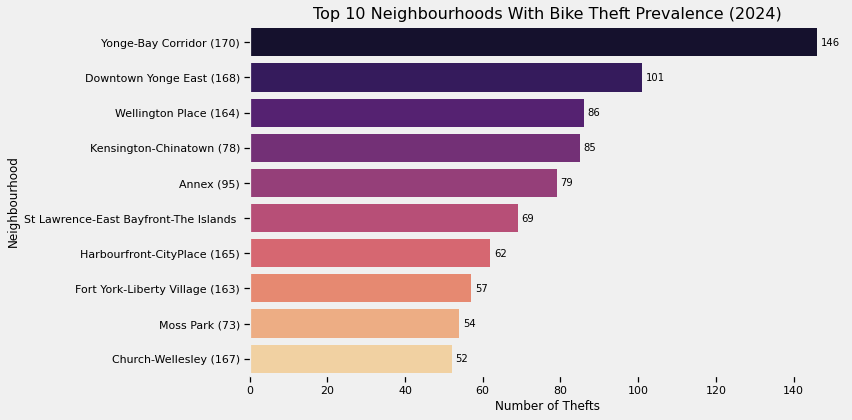

In [9]:
#Let's explore the neighbourhoods which are most prone to bike theft in the year 2024.

bike_thefts_2024 = bike_data[bike_data['year']==2024]

#groupby the NEIGHBOURHOOD_158 column which contains all 158 neighbourhoods within Toronto

neighbourhood_counts = (
    bike_thefts_2024.groupby('NEIGHBOURHOOD_158').size().reset_index(name = 'Theft_Count')
)

#to plot the top 10 neighbourhoods, lets sort the counts 

top_neighbourhoods = neighbourhood_counts.sort_values(by = 'Theft_Count', ascending=False).head(10)

#plot the top 10 neighbourhoods in a barplot and use a colour gradient to visualize intensities

plt.figure(figsize=(12, 6))
sns.barplot(data=top_neighbourhoods, x='Theft_Count', y='NEIGHBOURHOOD_158', palette='magma')

plt.title('Top 10 Neighbourhoods With Bike Theft Prevalence (2024)', fontsize=16)
plt.xlabel('Number of Thefts', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

#insert numerical values beside bars
for i, value in enumerate(top_neighbourhoods['Theft_Count']):
    plt.text(value + 1, i, str(value), va='center', fontsize=10)

plt.tight_layout()
plt.show()

*The TPS provides a bike identification system which allows the registered bike owner to retrieve their stolen bike on the chance it may be found by police or general public. Let's see the ratio between the bikes marked as stolen and those that have been recovered.*

Text(0.5, 1.0, 'Bike Theft Status (%)')

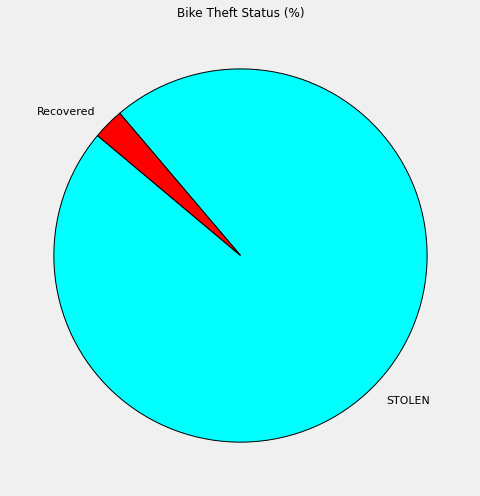

In [15]:
status_count = bike_data['STATUS'].value_counts()

#there are three unique statuses 'Unknown' , 'Recovered' , and 'Stolen' - combine unknown and recovered and consider its combination recovered


status_count['Recovered'] = status_count.loc[['UNKNOWN','RECOVERED']].sum()
status_count = status_count.drop(['UNKNOWN','RECOVERED']) #remove unknown from the count

#create a pie chart to visualize the ratio between stolen and recovered.

plt.figure(figsize = (8,8))

plt.pie(status_count, labels =status_count.index, colors = ['cyan', 'red'], startangle = 140, wedgeprops={'edgecolor': 'black'})
plt.title('Bike Theft Status (%)')

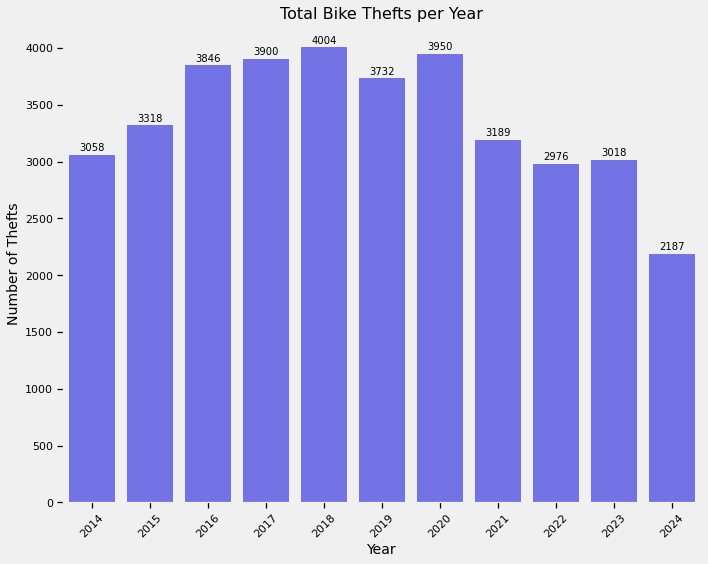

In [19]:
#plot the total theft by available years.

#groupby year
bike_theft_yearly = bike_data.groupby('year').size().reset_index(name = 'Theft_Count')

#plot

plt.figure(figsize=(10,8))

#create a bar plot 
sns.barplot(x = 'year', y='Theft_Count', data=bike_theft_yearly, color = 'blue', alpha =0.6)

#insert numerical values beside above bars
for i, bar in enumerate(plt.gca().containers[0]):
    height = bar.get_height() #get the height of bar to position the annotation properly
    plt.text(
        bar.get_x() + bar.get_width()/2, height + 20, #position the horizontal and vertical
        f'{int(height)}', #this takes the bar height value which is equivalent to the theft count
        ha = 'center', va='bottom', fontsize =10, color = 'black'
    )

plt.title('Total Bike Thefts per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Thefts', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

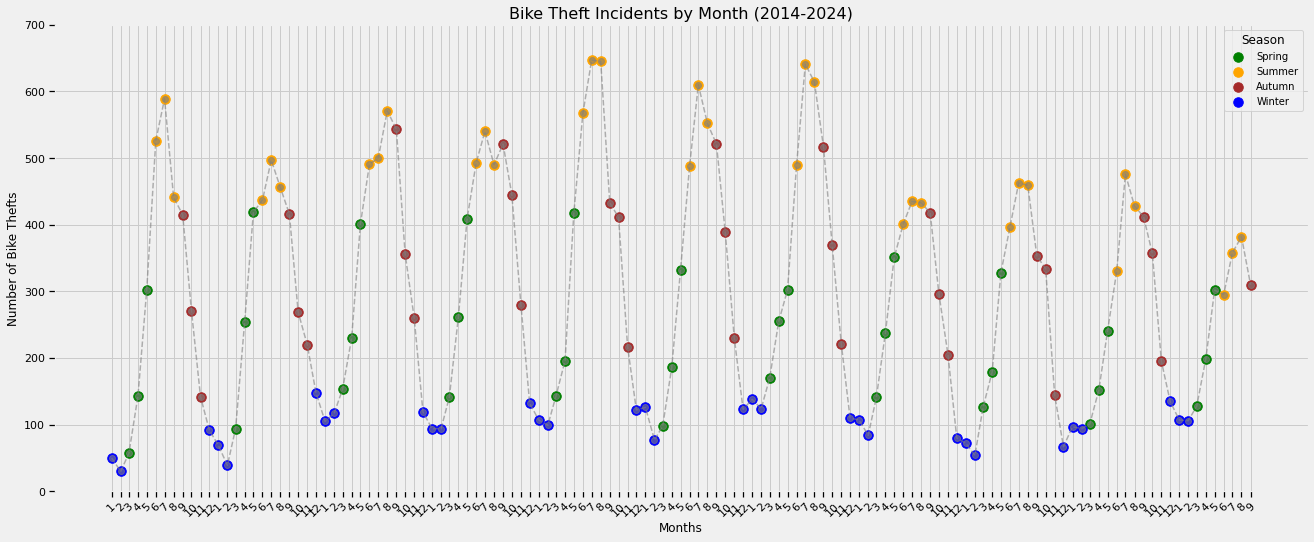

In [ ]:
#lets make a plot similar to previous plot but with lineplot. Make the x-axis interval in months to show seasonal/monthly trends.
bike_data_grouped = bike_data.groupby(['year','month']).size().reset_index(name = 'Theft_Count')

#create a new column named 'date' to plot the first day of the month for the particular year
bike_data_grouped['date'] = pd.to_datetime(bike_data_grouped[['year','month']].assign(day=1))

#to make our plot more visible let's colour code the different seasons of a year
def season_colour(month):
    if month in [3, 4, 5]:      #Mar - May = spring/green
        return 'green'
    elif month in [6, 7, 8]:    #June-Aug = Summer/orange
        return 'orange'
    elif month in [9, 10, 11]:  #Sept - Nov = Autumn/brown
        return 'brown'
    else:                       #Dec - Feb = Winter/blue
        return 'blue'

#create new column 'Season_Colour' and apply the season_colour function to the month
bike_data_grouped['Season_Colour'] = bike_data_grouped['month'].apply(season_colour)


plt.figure(figsize=(20, 8))
plt.plot(bike_data_grouped['date'], bike_data_grouped['Theft_Count'], marker='o', color='grey', alpha=0.6, linestyle='--')

#create scatter plot on the lineplot using the correct colour 
for season, colour in zip(['Spring', 'Summer', 'Autumn', 'Winter'], ['green', 'orange', 'brown', 'blue']):
    subset = bike_data_grouped[bike_data_grouped['Season_Colour'] == colour]
    plt.scatter(subset['date'], subset['Theft_Count'],color=colour,label=season, s=90)

plt.title('Bike Theft Incidents by Month (2014-2024)', fontsize=16)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Number of Bike Thefts', fontsize=12)

plt.xticks(bike_data_grouped['date'], bike_data_grouped['month'], rotation = 45)

plt.legend(title='Season', fontsize=10)
plt.grid(True)
plt.ylim(0, 700)
plt.show()

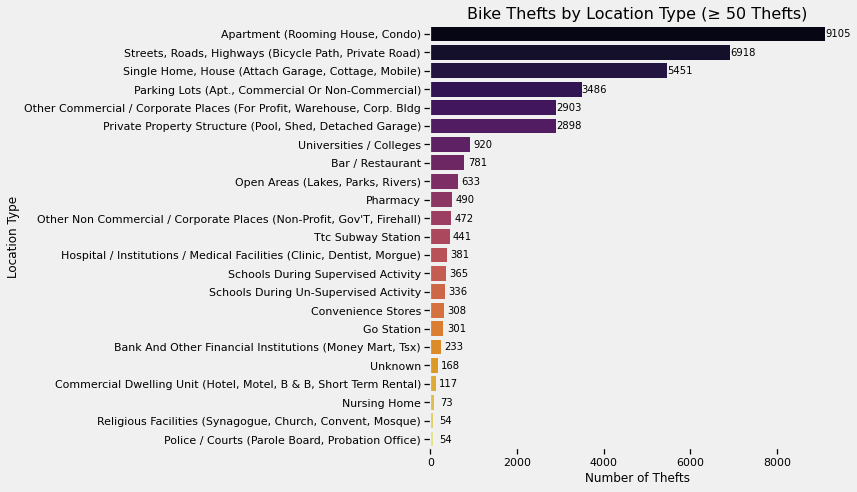

In [28]:
#plot the relationship between theft and location type
location_type_theft = bike_data['LOCATION_TYPE'].value_counts().reset_index()
location_type_theft.columns = ['location_type','theft_count'] #include only two columns in df

#as to condense our plot, lets only focus on location types with 50 or more thefts
location_type_theft_filt = location_type_theft[location_type_theft['theft_count']>=50]

plt.figure(figsize = (12,7))
sns.barplot(data = location_type_theft_filt, x ='theft_count', y='location_type', palette = 'inferno')

#add the theft values beside each bar
for x, bar in enumerate(plt.gca().containers[0]):
    width = bar.get_width()
    plt.text(
        width + 300, bar.get_y()+bar.get_height()/2, #position outside bar so its legible
        f'{int(width)}',
        ha='center', va='center', fontsize =10, color='black'
    )

plt.title('Bike Thefts by Location Type (≥ 50 Thefts)', fontsize=16)
plt.xlabel('Number of Thefts', fontsize=12)
plt.ylabel('Location Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


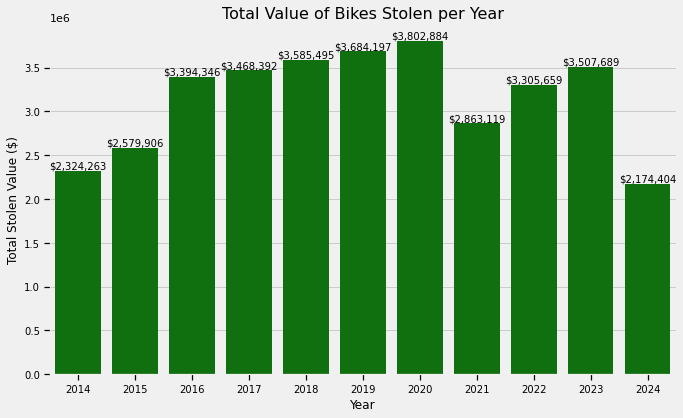

In [31]:
#lets plot the relationship between year and the total cost of stolen bikes

cost_per_year = bike_data.groupby('year')['BIKE_COST'].sum().reset_index()

plt.figure(figsize = (10,6))
sns.barplot(data = cost_per_year, x = 'year', y='BIKE_COST', color = 'green')
#annotate bar with value in unit of $
for i, value in enumerate(cost_per_year['BIKE_COST']):
    plt.text(i, value +500,
             f'${value:,.0f}',
             ha='center', va='bottom', fontsize =10)
    
plt.title('Total Value of Bikes Stolen per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Stolen Value ($)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



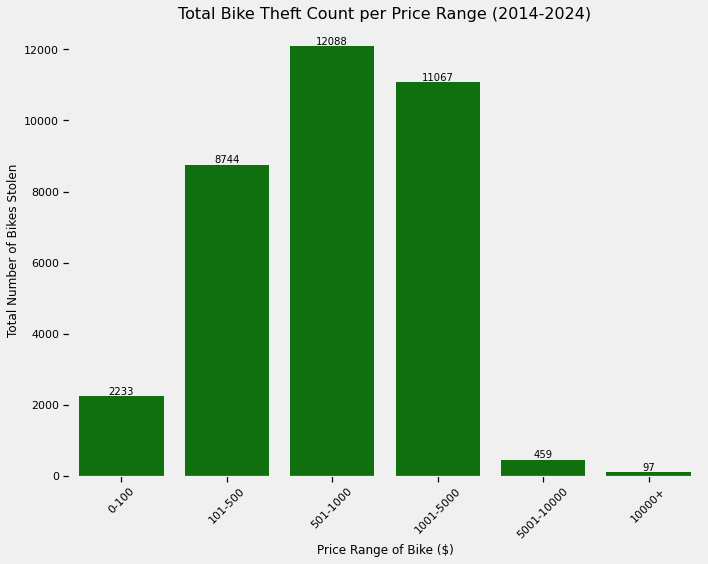

In [ ]:
#now lets plot theft vs price range of bike
price_bins = [0,100,500,1000,5000,10000,10000000] #ranges for dollars
price_labels =['0-100','101-500','501-1000','1001-5000','5001-10000','10000+']

#create new column and label the price range
bike_data['price_range'] = pd.cut(bike_data['BIKE_COST'], bins = price_bins, labels =price_labels, right=False)

#now use groupby for the range and find total thefts across all years
price_range_theft = bike_data.groupby('price_range').size().reset_index(name='Theft_Count')

plt.figure(figsize=(10, 8))
sns.barplot(data = price_range_theft, x = 'price_range', y='Theft_Count', color = 'green')

#annotate the theft count above bars
for x, row in price_range_theft.iterrows():
    plt.text(x, row.Theft_Count+5, int(row.Theft_Count), ha='center', va = 'bottom', fontsize=10)
    
plt.title('Total Bike Theft Count per Price Range (2014-2024)', fontsize=16)
plt.xlabel('Price Range of Bike ($)', fontsize=12)
plt.ylabel('Total Number of Bikes Stolen', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

